In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
cwd = os.getcwd()

cwd

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part2'

In [2]:
adult_df = pd.read_csv("data/ch5/adult.csv")

adult_df.head(10)   

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Numerical_attributes 시각화하기
Numerical 속성은 histogram과 boxplot으로 시각화하면 속성의 특징을 쉽게 이해할 수 있다.


<br>

### suplot 기본값
**plt.subplot(nrows,ncols,index)** <br>
**221 의미 => 2x2의 첫번째 줄의 첫번째 칸**<br>
**223 의미 => 2x2의 두번째 줄의 첫번째 칸**<br>

In [3]:
numerical_attributes = ['age', 'fnlwgt','education-num']
a = adult_df.iloc[:,0].index
print(a)

RangeIndex(start=0, stop=32561, step=1)


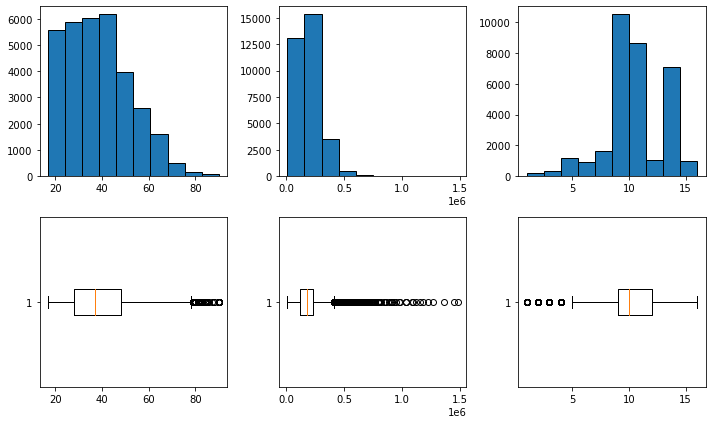

In [4]:
numerical_attributes = ['age', 'fnlwgt','education-num']

plt.figure(figsize=(10,6))

for i, col in enumerate(numerical_attributes) :
    plt.subplot(2,3,i+1)
    a = adult_df[col]
    plt.hist(a, edgecolor='black')

    plt.subplot(2,3,i+4)
    a = adult_df[col]
    plt.boxplot(a, vert=False)


plt.tight_layout()
plt.show()

![image](./data/ch5/boxplot.png)

### Categorical Attribute 살펴보기

카테고리 속성은 바차트를 이용해서 시각화하면 보기 편하다.

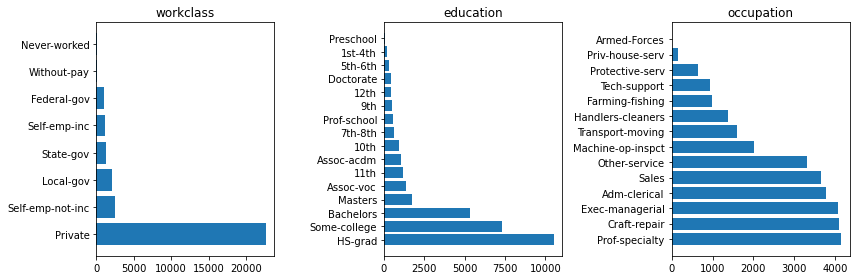

In [6]:
categorical_attributes =['workclass', 'education', 'occupation']
a = adult_df[categorical_attributes].value_counts()
total = len(categorical_attributes)
plt.figure(figsize=(12,4))
for i, att in enumerate(categorical_attributes) :
    plt.subplot(1,3,i+1)
    a = adult_df[att].value_counts()
    plt.barh(a.index,a)
    plt.title(att)
plt.tight_layout()
plt.show()

### Y축 눈금 바꾸기
plt.yticks([축에 있는 값], [변경하고 싶은 값]) <br>
아래 예시처럼 하나만 변경하고 싶을지라도 [ ]로 감싸야함

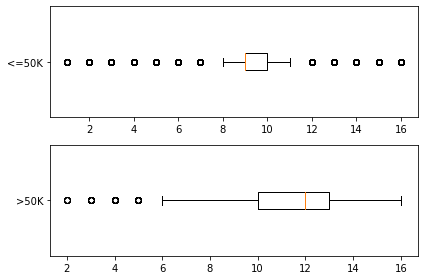

In [100]:
income_possibilities = adult_df['income'].unique()

for i in range(2) :
    plt.subplot(2,1,i+1)
    a = adult_df[adult_df['income'] ==income_possibilities[i]]['education-num']
    plt.boxplot(a ,vert=False)
    plt.yticks([1],[income_possibilities[i]])


plt.tight_layout()
plt.show()



대상 구분하는 표 만들기 (legend)
1. plt에 label을 넣는다.
2. plt.legend() 명령어를 넣는다.

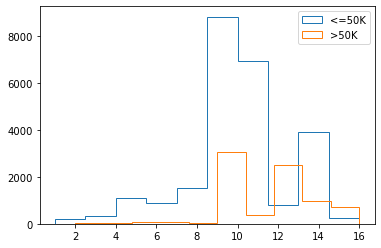

In [113]:
income_possibilities = adult_df['income'].unique()
for poss in income_possibilities :
    a = adult_df['income'] == poss
    b = adult_df['education-num'][a]
    plt.hist(b, label=poss,histtype='step')
plt.legend()    
plt.show()

### 1. Categorical Attributes에는 value_count()를 써야한다.

* Categorical의 경우 Class를 Index로 쓰기 때문에 .unique()를 Index로 사용해도 된다.
* 다만 value_counts()를 사용하면 Class가 자동으로 포함되기에 .unique()를 쓴다.

### 2. Groupby를 사용할 땐 value_counts()를 쓰지않고 size()를 쓴다.

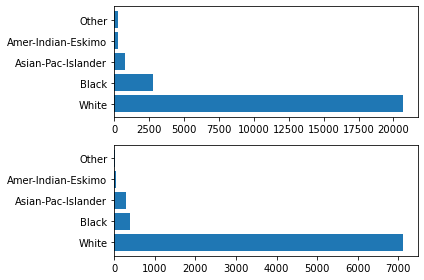

In [132]:
income_possibilities = adult_df['income'].unique()
for i, att in enumerate(income_possibilities):
    plt.subplot(2,1,i+1)
    a = adult_df['income'] == att
    b = adult_df['race'][a].value_counts()
    plt.barh(b.index,b)
plt.tight_layout()
plt.show()

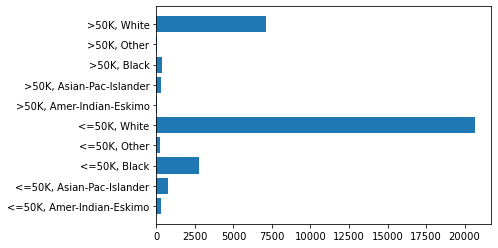

In [39]:
a = adult_df.groupby(['income','race']).size()
b = [a+", "+b for a,b in a.index]
plt.barh(b, a)
plt.show()

<AxesSubplot:ylabel='race,income'>

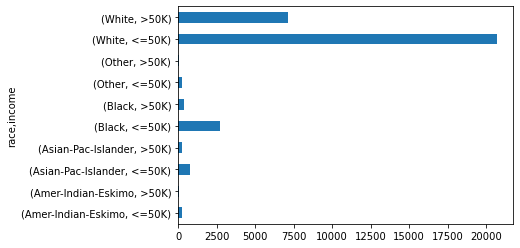

In [41]:
adult_df.groupby(['race','income']).size().plot.barh()

### Unstack()을 하면 class를 색으로 구분한다.

### groupby 순서에 따라 label과 y축 위치기 달라진다.

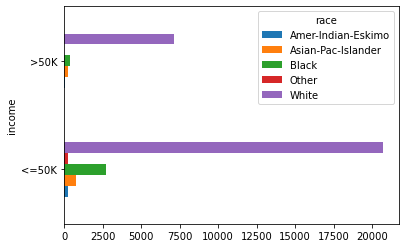

In [55]:
adult_df.groupby(['income','race']).size().unstack().plot.barh()
plt.show()

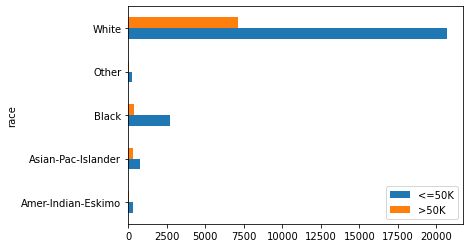

In [51]:
adult_df.groupby(['race','income']).size().unstack().plot.barh()
plt.legend(loc=4)
plt.show()

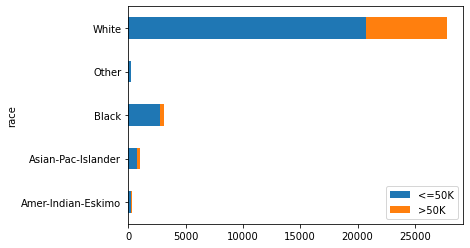

In [54]:
adult_df.groupby(['race','income']).size().unstack().plot.barh(stacked=True)
plt.legend(loc=4)
plt.show()